In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer 
from scipy import stats
from sklearn.utils import shuffle 
from sklearn.inspection import permutation_importance

df= pd.read_csv('df-filteredfinalN.csv')
                
x=df[['Day','State ID','Lat','Long_','Incident_Rate','Active','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio']].values

y=df['Confirmed'].values

y1= df['Deaths'].values

y2= df['Recovered'].values



The following code is presented to compare the performances of the Naive Bayes Classifer and the Decision Tree Classifier on the dataset named 'df-filteredfinalN.csv'.

# Naive Bayes Performance:

# A. Label 1('Confirmed'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Text(0, 0.5, 'Accuracy')

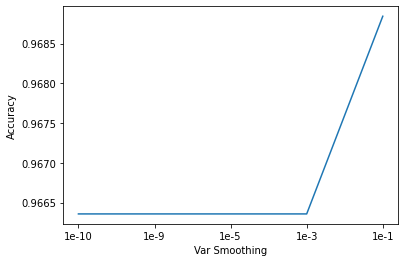

In [4]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

params_NB= {'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}
gs_NB= GridSearchCV(estimator= GaussianNB(), param_grid=params_NB, cv=10, verbose=1, scoring='accuracy')

TransformedData= PowerTransformer().fit_transform(x_train)

gs_NB.fit(TransformedData, y_train)

df_score= pd.DataFrame.from_dict(gs_NB.cv_results_)

var_smoothing= ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']

plt.plot(var_smoothing, df_score.mean_test_score)

plt.xlabel("Var Smoothing")
plt.ylabel("Accuracy")

Fig.1 Accuracy based on different smoothing parameter for Naive Bayes for the label 1 

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The data is classified using Naive Bayes Classifer with the smoothing parameter being: {1e-10, 1e-9, 1e-5, 1e-3, 1e-1}. The Naive Bayes Classifer is intialized as 'gs_NB'and the K-fold cross validation is used with k being 10 for the trees. 'GridSearchCV' is used to find the best values for the classifier. The Mean accuracy of the trained estimators is reported on a plot using the plot command from the Matplot library.

As shown in figure 1, it is clear that by increasing smoothing parameter the Accuracy improved slightly.

In [5]:
gs_NB.best_params_

{'var_smoothing': 0.1}

In [6]:
gs_NB.best_score_

0.9688425925925925

In [7]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=0.1)

Therfore, the best value for smoothing parametr is 1e-1 for the label 1.

In [8]:
classifier= GaussianNB(var_smoothing= 0.1)
classifier.fit(x_train, y_train)

predY= classifier.predict(x_test)

print('Accuracy on Test Set:', accuracy_score(y_test,predY))

Accuracy on Test Set: 0.9601990049751243


The test accuracy reached 96.01%.

# B. Label 2('Deaths'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Text(0, 0.5, 'Accuracy')

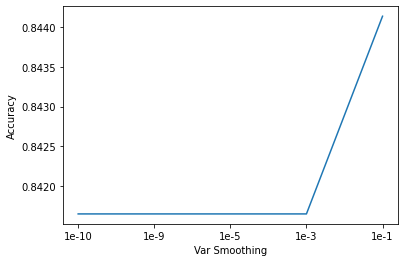

In [3]:

x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size = 0.2, random_state = 0)

params_NB= {'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}
gs_NB= GridSearchCV(estimator= GaussianNB(), param_grid=params_NB, cv=10, verbose=1, scoring='accuracy')

TransformedData= PowerTransformer().fit_transform(x_train)

gs_NB.fit(TransformedData, y_train)

df_score= pd.DataFrame.from_dict(gs_NB.cv_results_)

var_smoothing= ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']

plt.plot(var_smoothing, df_score.mean_test_score)

plt.xlabel("Var Smoothing")
plt.ylabel("Accuracy")

Fig. 2 Accuracy based on different smoothing parameter for Naive Bayes for the label 2

It is clear that by increasing smoothing parameter the Accuracy improved slightly. 

In [5]:
gs_NB.best_params_

{'var_smoothing': 0.1}

In [6]:
gs_NB.best_score_

0.8441358024691358

In [7]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=0.1)

In [8]:
classifier= GaussianNB(var_smoothing= 0.1)
classifier.fit(x_train, y_train)

predY= classifier.predict(x_test)

print('Accuracy on Test Set:', accuracy_score(y_test,predY))

Accuracy on Test Set: 0.8805970149253731


Therfore, the best value for smoothing parametr is 1e-1 for the label 2

# C. Label 3('Recovered'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Text(0, 0.5, 'Accuracy')

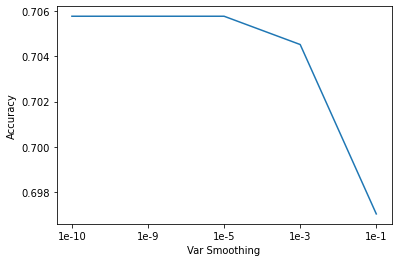

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size = 0.2, random_state = 0)

params_NB= {'var_smoothing': [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]}
gs_NB= GridSearchCV(estimator= GaussianNB(), param_grid=params_NB, cv=10, verbose=1, scoring='accuracy')

TransformedData= PowerTransformer().fit_transform(x_train)

gs_NB.fit(TransformedData, y_train)

df_score= pd.DataFrame.from_dict(gs_NB.cv_results_)

var_smoothing= ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']

plt.plot(var_smoothing, df_score.mean_test_score)

plt.xlabel("Var Smoothing")
plt.ylabel("Accuracy")

Fig. 3 Accuracy based on different smoothing parameter for Naive Bayes for the label 3

It is clear that by increasing smoothing parameter the Accuracy went down slightly. 

In [11]:
gs_NB.best_params_

{'var_smoothing': 1e-10}

In [12]:
gs_NB.best_score_

0.7057716049382716

In [13]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=1e-10)

Therfore, the best value for smoothing parametr is 1e-10 for the label 3.

In [24]:
classifier= GaussianNB(var_smoothing= 1e-10)
classifier.fit(x_train, y_train)

predY= classifier.predict(x_test)

print('Accuracy on Test Set:', accuracy_score(y_test,predY))

Accuracy on Test Set: 0.7014925373134329


The test accuracy reached 70.14%.

# Decision Tree Performance:

# A. Label 1('Confirmed')

Fitting 10 folds for each of 4 candidates, totalling 40 fits


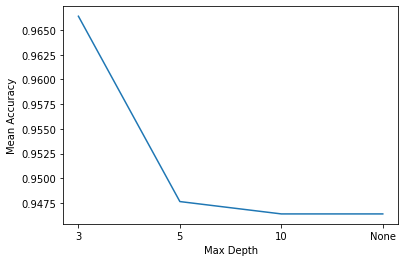

In [11]:
decision_tree = DecisionTreeClassifier()
param_dict = {"max_depth": [3,5,10,None], 'random_state':[0]}
grid= GridSearchCV(decision_tree, param_grid=param_dict, cv=10,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)
max_depth=['3','5','10','None']
plt.tight_layout()
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.plot(max_depth,grid.cv_results_['mean_test_score'])

Fig. 4 Mean Accuracy based on maximum depth for Decision Tree for the label 1 

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The data is classified using Decision trees with the maximum depth being: {3,5,10,None}(1). K-fold cross validation is used with k being 10 for the trees. 'GridSearchCV' is used to find the best values for the classifier(2). The Mean accuracy of the trained estimators is reported on a plot using the plot command from the Matplot library(3).

In [12]:
grid.best_params_

{'max_depth': 3, 'random_state': 0}

In [13]:
grid.best_score_

0.9663888888888887

In [14]:
grid.best_estimator_ 

DecisionTreeClassifier(max_depth=3, random_state=0)

The best parameter for the Decision Tree Classifier is when the max-depth is 3.

In [15]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
print("Accuracy on Test set: ",accuracy_score(y_test,y_pred))

Accuracy on Test set:  0.945273631840796


The accuracy of the test set for the trained classifier is approximately 94.52%.

# B. Label 2('Deaths'):

Fitting 10 folds for each of 4 candidates, totalling 40 fits


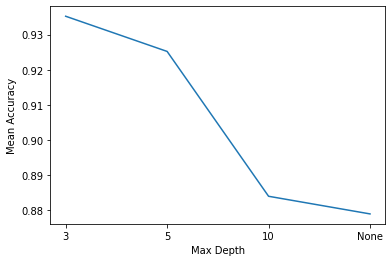

In [14]:
x=df[['Day','State ID','Lat','Long_','Incident_Rate','Active','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio']].values
y1=df['Deaths'].values
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size = 0.2, random_state = 0)
decision_tree = DecisionTreeClassifier()
param_dict = {"max_depth": [3,5,10,None], 'random_state':[0]}
grid= GridSearchCV(decision_tree, param_grid=param_dict, cv=10,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)
max_depth=['3','5','10','None']
plt.tight_layout()
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.plot(max_depth,grid.cv_results_['mean_test_score'])

Fig. 5 Mean Accuracy based on maximum depth for Decision Tree for the label 2

In [15]:
grid.best_params_

{'max_depth': 3, 'random_state': 0}

In [16]:
grid.best_score_

0.9352006172839508

In [17]:
grid.best_estimator_ 

DecisionTreeClassifier(max_depth=3, random_state=0)

The best parameter for the Decision Tree Classifier is when the max-depth is 3.

In [18]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
print("Accuracy on Test set: ",accuracy_score(y_test,y_pred))

Accuracy on Test set:  0.9353233830845771


The accuracy of the test set for the trained classifier is approximately 93.53%.

# C. Label 3('Recovered'):

Fitting 10 folds for each of 4 candidates, totalling 40 fits


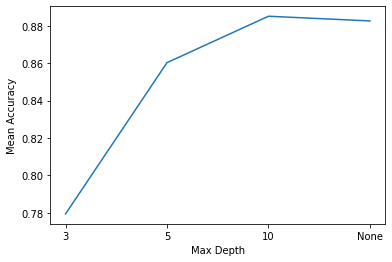

In [19]:
x=df[['Day','State ID','Lat','Long_','Incident_Rate','Active','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio']].values
y2=df['Recovered'].values
x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size = 0.2, random_state = 0)
decision_tree = DecisionTreeClassifier()
param_dict = {"max_depth": [3,5,10,None], 'random_state':[0]}
grid= GridSearchCV(decision_tree, param_grid=param_dict, cv=10,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)
max_depth=['3','5','10','None']
plt.tight_layout()
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.plot(max_depth,grid.cv_results_['mean_test_score'])

Fig 6. Mean Accuracy based on maximum depth for Decision Tree for the label 3

In [20]:
grid.best_params_

{'max_depth': 10, 'random_state': 0}

In [21]:
grid.best_score_

0.8851851851851851

In [22]:
grid.best_estimator_ 

DecisionTreeClassifier(max_depth=10, random_state=0)

The best parameter for the Decision Tree Classifier is when the max-depth is 10.

In [23]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
print("Accuracy on Test set: ",accuracy_score(y_test,y_pred))

Accuracy on Test set:  0.8507462686567164


The accuracy of the test set for the trained classifier is approximately 85.07%.

# Comparison:

When comparing the Naive Bayes Classifier and the Decision Tree Classifier; the accuracy on the Test Set was greater for the first label('Confirmed') with the Naive Bayes having a two percent greater accuracy in predicting the correct values(96.02% >94.2%).

But, the Naive Bayes performed less accurately and very poorly with second and third labels 'Deaths' and 'Recovered' respectively. The accuracy score was at approximately 88.1% for the second label and 70.5% for third label. The Decision Tree Classifier performed better with accuracy scores of approximately 93.5% and 85.1% for label 2 and label 3 respectively.

Decision tree vs naive Bayes(4):
Decision tree is a discriminative model, whereas Naive bayes is a generative model.
Decision trees are more flexible and easy.
Decision tree pruning may neglect some key values in training data, which can lead the accuracy for a toss.

# Refrences:

(1) https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(2) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

(3) https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

(4) https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222